In [1]:
from scipy import io as sio
from matplotlib import pyplot as plt
import numpy as np

Блокнот, чтобы собрать все нужные данные для GAN.
Из патента следуюет, что используются 3 признака:
* Центральная частота -Freq
* Длительность на полувысоте - DuratPeriods 
* Ширина полосы частот на полувысоте - BandwidthesHz

In [2]:
data_path = '/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control/'

##  Центральная частота - Freq

['Flash_Freq_Stack', '__globals__', '__header__', '__version__']
(1226, 1)
[[ 0.4]
 [ 0.4]
 [ 0.4]
 ...
 [42.1]
 [42.1]
 [42.4]]


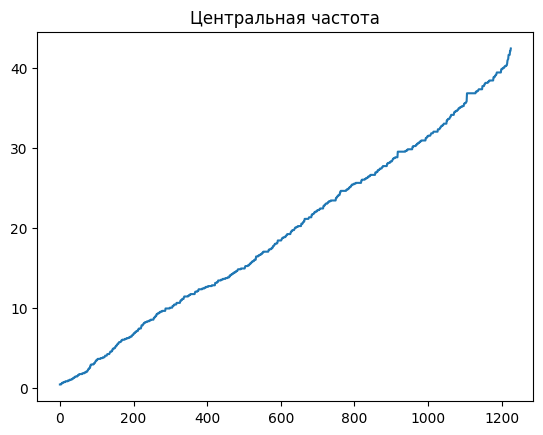

In [3]:
mat_contents = sio.loadmat(data_path + 'аста0101.txt_EMG1Freq.mat')
print(sorted(mat_contents.keys()))
freq_signal  = mat_contents['Flash_Freq_Stack']
print(freq_signal.shape)
print(freq_signal)
plt.plot(freq_signal)
plt.title('Центральная частота')
plt.show()


## Длительность на полувысоте - DuratPeriods

['Flash_Durat_In_Periods_Stack', '__globals__', '__header__', '__version__']
(1226, 1)
[[1.196 ]
 [1.3056]
 [4.8568]
 ...
 [1.1788]
 [1.1788]
 [1.272 ]]


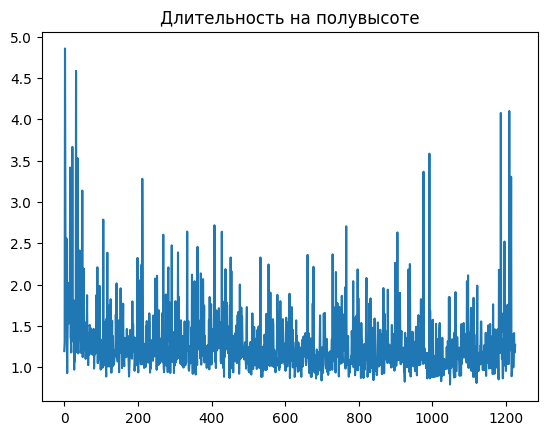

In [4]:
mat_contents = sio.loadmat(data_path + 'аста0101.txt_EMG1DuratPeriods.mat')
print(sorted(mat_contents.keys()))
Flash_Durat_signal  = mat_contents['Flash_Durat_In_Periods_Stack']
print(Flash_Durat_signal.shape)
print(Flash_Durat_signal)
plt.plot(Flash_Durat_signal)
plt.title('Длительность на полувысоте')
plt.show()

## Ширина полосы частот на полувысоте - BandwidthesHz

['Flash_Band_In_Hz_Stack', '__globals__', '__header__', '__version__']
(1226, 1)
[[ 0. ]
 [ 0. ]
 [ 0. ]
 ...
 [14.1]
 [12.5]
 [12.7]]


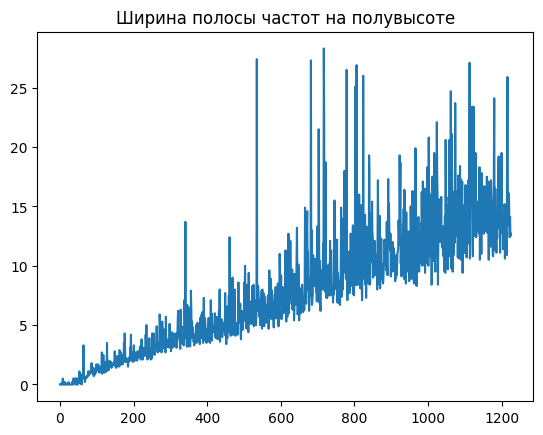

In [5]:
mat_contents = sio.loadmat(data_path + 'аста0101.txt_EMG1BandwidthesHz.mat')
print(sorted(mat_contents.keys()))
BandwidthesHz_signal  = mat_contents['Flash_Band_In_Hz_Stack']
print(BandwidthesHz_signal.shape)
print(BandwidthesHz_signal)
plt.plot(BandwidthesHz_signal)
plt.title('Ширина полосы частот на полувысоте')
plt.show()

In [89]:
def load_parameter(patient, EMG, parameter, data_path = '/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control/' ):
    print(data_path +'/'+patient + '_EMG' + str(EMG)+ parameter + '.mat')
    mat_contents = sio.loadmat(data_path +'/'+patient + '_EMG' + str(EMG)+ parameter + '.mat')
    if parameter =='BandwidthesHz':
        signal  = mat_contents['Flash_Band_In_Hz_Stack']
    elif parameter == 'DuratPeriods':
        signal = mat_contents['Flash_Durat_In_Periods_Stack']
    elif parameter == 'Freq':
        signal  = mat_contents['Flash_Freq_Stack']
    else:
        print('no parameter, but the kyes are', sorted(mat_contents.keys()))
    return signal
        
    

##  Извлечение характеристик

Диапазоны частот из патента стр 22, поза с выпрямленными ладонями:

РУКИ

1 диапазон	2 диапазон	3 диапазон	

БП 2,2-3,7	4-6	7-18

1 диапазон	2 диапазон	3 диапазон

ЭТ 1,5-3,3	4-7	10-27

НОГИ

БП 2,1-4	4-7	9-35	

ЭТ 0,9-1,2	8-12	12-22


### Руки 
Извлечем теперь характеристики, соотвествующие этим частотам. Начнем с рук. выберем интервалы, характерные для БП и ЭТ.

In [83]:
def check_if_in_interval(value, interval):
    in_interval  = False
    if value > interval[0] and value < interval[1]:
        in_interval  = True
    return in_interval 

In [99]:
# EMG1 & EMG2
# финальный вектор для нейронной сети
feature_hands = np.zeros(12) # 6 intervals
patient = 'аста0101.txt'
# выберем интервалы из патента
intervals_frequency = [[2.2,3.7],[4,6], [7,18], [1.5,3], [4,7], [10,27]]
intervals_Flash_Durat = [[1, np.Inf],[2, np.Inf],[1.3,2.5],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,2.4],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
for emg in range(1,3):
    freq_signal = load_parameter(patient,emg,'Freq')
    Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods')
    BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz')
    for i in range(len(freq_signal)):
        for interval in range(len(intervals_frequency)):
            if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
    #                 print(main_signal[i], intervals_frequency[interval], \
    #                       Flash_Durat_signal[i],intervals_Flash_Durat[interval],
    #                      BandwidthesHz_signal[i], intervals_BandwidthesHz[interval])
                    feature_hands[interval+(emg-1)*6] += 1
print(feature_hands)

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG1BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG2BandwidthesHz.mat
[ 31.   1.   7.  44.  78. 555.  43.   0.  11.  46.  66. 573.]


Нужно нормализовать полученный вектор

Как посчитать длительность сигнала. Возьмем, например, папку контроль:
В папке "Параметры всплесков - поза" есть папка "Margo_DATA_Control". Внутри есть для каждого пациента файлы, окончивающиеся на "TimeAndFrequency.mat". Внутри этого файла есть переменная Time, в ней указано время каждого отсчёта. Поэтому мы можем взять время последнего отсчёта и вычесть из него время первого отсчёта. То есть, длительность сигнала можно вычислить как max(Time) - min(Time);

In [100]:
# time and frequency
mat_contents = sio.loadmat(data_path + 'аста0101.txt_EMG1TimeAndFrequency.mat')
# print(sorted(mat_contents.keys()))
time_signal  = mat_contents['Time']
total_sec = max(time_signal.ravel())-min(time_signal.ravel())
print('Total signal lenght: ', total_sec)


Total signal lenght:  135.088


In [101]:
max(time_signal.ravel())

135.088

In [110]:
# Финальный вектор для рук будет выглядеть вот так:
print(feature_hands/total_sec)

[0.22948004 0.00740258 0.05181807 0.32571361 0.5774014  4.10843302
 0.31831103 0.         0.0814284  0.34051877 0.48857041 4.2416795 ]


### Ноги
Извлечем теперь характеристики, соотвествующие этим частотам. выберем интервалы, характерные для БП и ЭТ.

In [103]:
# выберем интервалы из патента
intervals_frequency = [[2.1,4],[4,7], [9,35], [0.9,12], [8,12], [12,22]]
intervals_Flash_Durat = [[1, np.Inf],[2,np.Inf],[1,3],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,3],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]

In [104]:
feature_legs = np.zeros(12) # 6 intervals
patient = 'аста0101.txt'
for emg in range(3,5):
    freq_signal = load_parameter(patient,emg,'Freq')
    Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods')
    BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz')
    for i in range(len(freq_signal)):
        for interval in range(len(intervals_frequency)):
            if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
    #                 print(main_signal[i], intervals_frequency[interval], \
    #                       Flash_Durat_signal[i],intervals_Flash_Durat[interval],
    #                      BandwidthesHz_signal[i], intervals_BandwidthesHz[interval])
                    feature_legs[interval+(emg-3)*6] += 1
print(feature_legs)

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG3DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG3BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG4Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG4DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//аста0101.txt_EMG4BandwidthesHz.mat
[ 47.   3.  10. 366. 134. 310.  51.   1.   8. 363. 122. 326.]


## Финальная характеристика
Обьединим признаки для рук и ног, и нормализуем их по времени

In [112]:
final_feature = np.concatenate((feature_hands, feature_legs))/total_sec
print(final_feature)

[0.22948004 0.00740258 0.05181807 0.32571361 0.5774014  4.10843302
 0.31831103 0.         0.0814284  0.34051877 0.48857041 4.2416795
 0.34792135 0.02220775 0.07402582 2.70934502 0.99194599 2.29480043
 0.37753168 0.00740258 0.05922066 2.68713727 0.90311501 2.41324174]


## Извлечение характеристик для всех пациентов
### Conrtol

In [122]:
from os import listdir
from os.path import isfile, join
patients = set()
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
# filter the files by name
for f in onlyfiles:
    if f[-3:]=='txt':
        pat = f.split('_')[0]
        patients.add(pat)
print(patients)
    

{'лега0104.txt', 'аста0101.txt', 'дюки0102.txt', 'черк0108.txt', 'фрол0106.txt', 'сидо0105.txt', 'керш0103.txt', 'хвал0107.txt'}


In [124]:
# вектор для сохранения характеристик
control_feature = np.zeros((len(patients), 24))
for n, patient in enumerate(patients):
    feature_hands = np.zeros(12) # 6 intervals
    # выберем интервалы из патента для рук
    intervals_frequency = [[2.2,3.7],[4,6], [7,18], [1.5,3], [4,7], [10,27]]
    intervals_Flash_Durat = [[1, np.Inf],[2, np.Inf],[1.3,2.5],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,2.4],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(1,3):
        freq_signal = load_parameter(patient,emg,'Freq')
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods')
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz')
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_hands[interval+(emg-1)*6] += 1
    feature_legs = np.zeros(12) # 6 intervals
    intervals_frequency = [[2.1,4],[4,7], [9,35], [0.9,12], [8,12], [12,22]]
    intervals_Flash_Durat = [[1, np.Inf],[2,np.Inf],[1,3],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,3],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(3,5):
        freq_signal = load_parameter(patient,emg,'Freq')
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods')
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz')
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_legs[interval+(emg-3)*6] += 1
    # достать время для этих сигналов
    mat_contents = sio.loadmat(data_path + patient + '_EMG1TimeAndFrequency.mat')
    time_signal  = mat_contents['Time']
    total_sec = max(time_signal.ravel())-min(time_signal.ravel())
    patient_feature = np.concatenate((feature_hands, feature_legs))/total_sec
    print(patient, patient_feature)
    control_feature[n,:]=patient_feature
        

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//лега0104.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//лега0104.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//лега0104.txt_EMG1BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//лега0104.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//лега0104.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//лега0104.txt_EMG2BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//лега0104.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_C

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//сидо0105.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//сидо0105.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//сидо0105.txt_EMG2BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//сидо0105.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//сидо0105.txt_EMG3DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//сидо0105.txt_EMG3BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Control//сидо0105.txt_EMG4Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_C

In [125]:
control_feature

array([[0.2341602 , 0.04532133, 0.06798199, 0.29458863, 0.69492703,
        4.03359821, 0.29458863, 0.01510711, 0.06042844, 0.41544551,
        0.65715926, 4.19222286, 0.32480285, 0.        , 0.18128531,
        0.37012418, 0.36257063, 3.30090341, 0.28703508, 0.        ,
        0.09819621, 0.36257063, 0.49098106, 3.60304559],
       [0.22948004, 0.00740258, 0.05181807, 0.32571361, 0.5774014 ,
        4.10843302, 0.31831103, 0.        , 0.0814284 , 0.34051877,
        0.48857041, 4.2416795 , 0.28129812, 0.01480516, 0.10363615,
        0.41454459, 0.56999882, 3.90856331, 0.32571361, 0.        ,
        0.27389553, 0.34051877, 0.50337558, 3.84194007],
       [0.23244327, 0.0145277 , 0.11622163, 0.35592876, 0.835343  ,
        4.24935352, 0.29055409, 0.04358311, 0.02905541, 0.37772031,
        0.87166226, 4.24935352, 0.21065171, 0.10169393, 0.03631926,
        0.37045646, 0.96609234, 4.43094982, 0.29781794, 0.02179156,
        0.13801319, 0.34140105, 0.65374669, 4.46726908],
       [0.314

### PD Left

In [130]:
data_path =  '/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left/'
patients = set()
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
# filter the files by name
for f in onlyfiles:
    if f[-3:]=='txt':
        pat = f.split('_')[0]
        patients.add(pat)
print(patients)
    

{'погр0106.txt', 'наза0105.txt', 'колг0103.txt', 'савв0107.txt', 'шелу0109.txt', 'кова0102.txt', 'сави0108.txt', 'ерми0101.txt', 'медв0104.txt'}


In [131]:
# вектор для сохранения характеристик
pd_left_feature = np.zeros((len(patients), 24))
for n, patient in enumerate(patients):
    feature_hands = np.zeros(12) # 6 intervals
    # выберем интервалы из патента для рук
    intervals_frequency = [[2.2,3.7],[4,6], [7,18], [1.5,3], [4,7], [10,27]]
    intervals_Flash_Durat = [[1, np.Inf],[2, np.Inf],[1.3,2.5],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,2.4],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(1,3):
        freq_signal = load_parameter(patient,emg,'Freq', data_path)
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods',data_path)
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz',data_path)
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_hands[interval+(emg-1)*6] += 1
    feature_legs = np.zeros(12) # 6 intervals
    intervals_frequency = [[2.1,4],[4,7], [9,35], [0.9,12], [8,12], [12,22]]
    intervals_Flash_Durat = [[1, np.Inf],[2,np.Inf],[1,3],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,3],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(3,5):
        freq_signal = load_parameter(patient,emg,'Freq',data_path)
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods',data_path)
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz',data_path)
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_legs[interval+(emg-3)*6] += 1
    # достать время для этих сигналов
    mat_contents = sio.loadmat(data_path + patient + '_EMG1TimeAndFrequency.mat')
    time_signal  = mat_contents['Time']
    total_sec = max(time_signal.ravel())-min(time_signal.ravel())
    patient_feature = np.concatenate((feature_hands, feature_legs))/total_sec
    print(patient, patient_feature)
    pd_left_feature[n,:]=patient_feature

        

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG1BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG2BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//погр0106.txt_EMG

шелу0109.txt [0.09778875 0.2016893  0.0061118  0.32392524 1.17346502 2.75030865
 0.21391289 0.0061118  0.03667078 0.33614883 0.70896845 4.51050618
 0.30558985 0.17724211 0.12834774 2.33470645 0.78231001 2.06578738
 0.34837243 0.01222359 0.06111797 2.36526544 1.03289369 2.32248286]
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//кова0102.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//кова0102.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//кова0102.txt_EMG1BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//кова0102.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Left//кова0102.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Marg

In [132]:
pd_left_feature

array([[0.16085634, 0.32902433, 0.0146233 , 0.21934956, 0.79697005,
        1.9887693 , 0.26321947, 0.00731165, 0.10967478, 0.37289424,
        0.51181563, 3.93366869, 0.06580487, 0.46794572, 0.        ,
        3.24637342, 2.25198877, 0.87008657, 0.25590781, 0.10967478,
        0.03655826, 2.25930042, 0.65073701, 2.49327328],
       [0.08069367, 0.36678942, 0.        , 0.23474523, 0.80693672,
        1.99533444, 0.23474523, 0.01467158, 0.04401473, 0.3154389 ,
        0.74825041, 3.92464678, 0.23474523, 0.11003683, 0.05868631,
        2.64088382, 0.81427251, 1.98799865, 0.27875996, 0.01467158,
        0.09536525, 2.63354803, 1.10770404, 1.99533444],
       [0.23463873, 0.01513798, 0.01513798, 0.37844957, 0.99910686,
        3.82990963, 0.28005268, 0.00756899, 0.02270697, 0.32546663,
        0.36331159, 3.96615147, 0.22706974, 0.09839689, 0.00756899,
        2.14959355, 0.24977671, 2.5356121 , 0.34060461, 0.02270697,
        0.03027597, 2.35395631, 0.46170847, 2.35395631],
       [0.029

### PD Right

In [134]:
data_path =  '/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right/'
patients = set()
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
# filter the files by name
for f in onlyfiles:
    if f[-3:]=='txt':
        pat = f.split('_')[0]
        patients.add(pat)
print(patients)

{'павл0106.txt', 'грек0104.txt', 'бело0101.txt', 'гава0102.txt', 'пана0107.txt', 'хлюс01011.txt', 'ротм0108.txt', 'серо0109.txt', 'губа0105.txt', 'соло01010.txt', 'голу0103.txt'}


In [135]:
# вектор для сохранения характеристик
pd_right_feature = np.zeros((len(patients), 24))
for n, patient in enumerate(patients):
    feature_hands = np.zeros(12) # 6 intervals
    # выберем интервалы из патента для рук
    intervals_frequency = [[2.2,3.7],[4,6], [7,18], [1.5,3], [4,7], [10,27]]
    intervals_Flash_Durat = [[1, np.Inf],[2, np.Inf],[1.3,2.5],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,2.4],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(1,3):
        freq_signal = load_parameter(patient,emg,'Freq', data_path)
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods',data_path)
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz',data_path)
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_hands[interval+(emg-1)*6] += 1
    feature_legs = np.zeros(12) # 6 intervals
    intervals_frequency = [[2.1,4],[4,7], [9,35], [0.9,12], [8,12], [12,22]]
    intervals_Flash_Durat = [[1, np.Inf],[2,np.Inf],[1,3],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,3],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(3,5):
        freq_signal = load_parameter(patient,emg,'Freq',data_path)
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods',data_path)
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz',data_path)
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_legs[interval+(emg-3)*6] += 1
    # достать время для этих сигналов
    mat_contents = sio.loadmat(data_path + patient + '_EMG1TimeAndFrequency.mat')
    time_signal  = mat_contents['Time']
    total_sec = max(time_signal.ravel())-min(time_signal.ravel())
    patient_feature = np.concatenate((feature_hands, feature_legs))/total_sec
    print(patient, patient_feature)
    pd_right_feature[n,:]=patient_feature

        

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106.txt_EMG1BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106.txt_EMG2BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//павл0106

пана0107.txt [0.26521867 0.02791775 0.06979439 0.36991024 0.67700554 4.06901269
 0.18844484 0.09771214 0.04885607 0.32803361 0.71888217 3.81077346
 0.25823923 0.06281495 0.02093832 2.44978294 0.41178688 2.41488575
 0.13958877 0.18844484 0.04885607 2.72896048 0.92128589 1.31911389]
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//хлюс01011.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//хлюс01011.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//хлюс01011.txt_EMG1BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//хлюс01011.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//хлюс01011.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры вспл

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//соло01010.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//соло01010.txt_EMG3DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//соло01010.txt_EMG3BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//соло01010.txt_EMG4Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//соло01010.txt_EMG4DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_Right//соло01010.txt_EMG4BandwidthesHz.mat
соло01010.txt [0.26030433 0.01487453 0.0446236  0.41648693 0.557795   4.00868673
 0.2900534  0.0223118  0.111559   0.3793006  0.4908596  3.62938613
 0.334677   0.01487453 0.0669354  2.7220396  1.0709664  2.35017626
 0.2677

In [136]:
pd_right_feature

array([[0.28141665, 0.00703542, 0.09146041, 0.36584165, 0.45026664,
        3.58806231, 0.14070833, 0.19699166, 0.00703542, 0.23216874,
        0.89349787, 2.55385611, 0.3447354 , 0.02110625, 0.07738958,
        2.68752902, 0.95681661, 2.46943112, 0.28141665, 0.06331875,
        0.02110625, 2.28651029, 0.50654997, 2.04730614],
       [0.26539681, 0.00758277, 0.05307936, 0.21990021, 0.47771425,
        3.98853486, 0.24264851, 0.06824489, 0.05307936, 0.35639   ,
        0.83410425, 4.39042145, 0.26539681, 0.27297957, 0.03791383,
        2.48714721, 0.6900317 , 2.13833998, 0.22748298, 0.32605893,
        0.03033106, 2.07009509, 0.54595914, 2.05492956],
       [0.28307372, 0.        , 0.04590385, 0.38253206, 0.65795514,
        4.34556416, 0.05355449, 0.48964103, 0.        , 0.27542308,
        0.72681091, 2.57061542, 0.38253206, 0.00765064, 0.15301282,
        2.82308657, 1.3771154 , 2.05802246, 0.15301282, 0.55084616,
        0.00765064, 1.4689231 , 0.09180769, 1.62193592],
       [0.114

### ET feature

In [137]:
data_path =  '/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET/'
patients = set()
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
# filter the files by name
for f in onlyfiles:
    if f[-3:]=='txt':
        pat = f.split('_')[0]
        patients.add(pat)
print(patients)

{'куту0105.txt', 'кудр0103.txt', 'купр0104.txt', 'макс0108.txt', 'миро0109.txt', 'луче0107.txt', 'соко01012.txt', 'тихо01013.txt', 'лити0106.txt', 'ершо0102.txt', 'молю01010.txt', 'даке0101.txt', 'муха01011.txt'}


In [138]:
# вектор для сохранения характеристик
et_feature = np.zeros((len(patients), 24))
for n, patient in enumerate(patients):
    feature_hands = np.zeros(12) # 6 intervals
    # выберем интервалы из патента для рук
    intervals_frequency = [[2.2,3.7],[4,6], [7,18], [1.5,3], [4,7], [10,27]]
    intervals_Flash_Durat = [[1, np.Inf],[2, np.Inf],[1.3,2.5],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,2.4],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(1,3):
        freq_signal = load_parameter(patient,emg,'Freq', data_path)
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods',data_path)
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz',data_path)
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_hands[interval+(emg-1)*6] += 1
    feature_legs = np.zeros(12) # 6 intervals
    intervals_frequency = [[2.1,4],[4,7], [9,35], [0.9,12], [8,12], [12,22]]
    intervals_Flash_Durat = [[1, np.Inf],[2,np.Inf],[1,3],[-np.Inf,np.Inf], [-np.Inf,np.Inf], [-np.Inf,np.Inf]]
    intervals_BandwidthesHz = [[-np.Inf,np.Inf], [0,2],[0,3],[-np.Inf,np.Inf],[-np.Inf,np.Inf],[-np.Inf,np.Inf]]
    for emg in range(3,5):
        freq_signal = load_parameter(patient,emg,'Freq',data_path)
        Flash_Durat_signal = load_parameter(patient,emg,'DuratPeriods',data_path)
        BandwidthesHz_signal = load_parameter(patient,emg,'BandwidthesHz',data_path)
        for i in range(len(freq_signal)):
            for interval in range(len(intervals_frequency)):
                if check_if_in_interval(freq_signal[i], intervals_frequency[interval]) and \
                    check_if_in_interval(Flash_Durat_signal[i], intervals_Flash_Durat[interval]) and \
                    check_if_in_interval(BandwidthesHz_signal[i], intervals_BandwidthesHz[interval]):
                        feature_legs[interval+(emg-3)*6] += 1
    # достать время для этих сигналов
    mat_contents = sio.loadmat(data_path + patient + '_EMG1TimeAndFrequency.mat')
    time_signal  = mat_contents['Time']
    total_sec = max(time_signal.ravel())-min(time_signal.ravel())
    patient_feature = np.concatenate((feature_hands, feature_legs))/total_sec
    print(patient, patient_feature)
    et_feature[n,:]=patient_feature


/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG1BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG2Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG2DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG2BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//куту0105.txt_EMG3DuratPeriods.ma

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//миро0109.txt_EMG4Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//миро0109.txt_EMG4DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//миро0109.txt_EMG4BandwidthesHz.mat
миро0109.txt [0.24812276 0.00652955 0.06529546 0.31341822 0.81619327 2.9970617
 0.35912504 0.03264773 0.05223637 0.34606595 0.54848188 4.1136141
 0.35912504 0.         0.07182501 2.85341169 1.16878877 2.0633366
 0.24159321 0.57460007 0.         1.69115246 0.33300686 0.6072478 ]
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//луче0107.txt_EMG1Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//луче0107.txt_EMG1DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//лу

/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//ершо0102.txt_EMG2BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//ершо0102.txt_EMG3Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//ершо0102.txt_EMG3DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//ершо0102.txt_EMG3BandwidthesHz.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//ершо0102.txt_EMG4Freq.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//ершо0102.txt_EMG4DuratPeriods.mat
/mnt/c/Users/KHOKHLOVAM/Documents/projects/kotelnikov/data/Параметры всплесков/Margo_DATA_ET//ершо0102.txt_EMG4BandwidthesHz.mat
ершо0102.txt [0.24107299 0.02191573 0.0511367  0.34334639 0.48945123 4.35392438
 0.34334639 0.         0.05844194 0.3

In [139]:
et_feature

array([[0.19879587, 0.11359764, 0.0141997 , 0.2981938 , 0.99397933,
        3.89071907, 0.22719527, 0.07809838, 0.02839941, 0.39759173,
        0.96557992, 3.87651937, 0.24849483, 0.37629217, 0.00709985,
        1.88856072, 0.3123935 , 3.06003635, 0.28399409, 0.05679882,
        0.00709985, 1.71106441, 0.26979439, 2.85414063],
       [0.25958558, 0.00763487, 0.03053948, 0.3053948 , 0.72531265,
        3.97776726, 0.17560201, 0.02290461, 0.05344409, 0.33593428,
        0.67950343, 3.77926064, 0.33593428, 0.01526974, 0.0763487 ,
        2.68747423, 1.11469102, 2.25228664, 0.37410863, 0.02290461,
        0.08398357, 2.65693475, 0.95435875, 2.27519125],
       [0.33991958, 0.02169699, 0.01446466, 0.36161657, 0.49903087,
        4.03564093, 0.22420227, 0.03616166, 0.05785865, 0.42670755,
        0.60028351, 4.15859056, 0.35438424, 0.        , 0.17357595,
        2.78444759, 1.39583996, 1.82977985, 0.24589927, 0.02169699,
        0.14464663, 2.86400324, 1.47539561, 1.98165881],
       [0.186